## Imports

In [1]:

import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Input
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

## 1.0 Sample Data

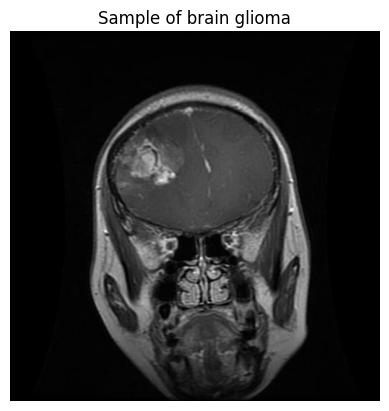

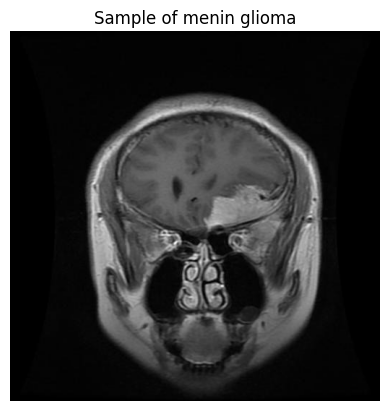

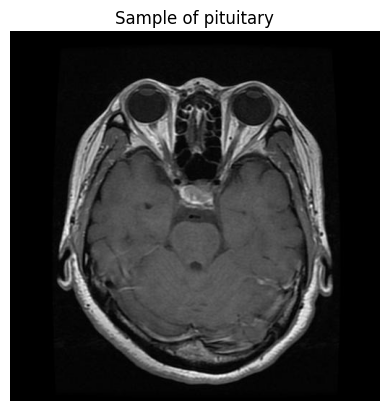

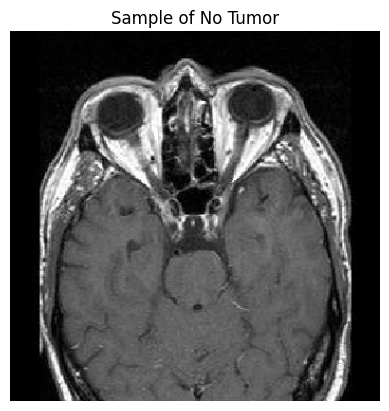

In [2]:
#Shows the user samples of the data

images_glioma_path = "Training/glioma"
images_menin_path = "Training/meningioma"
images_pituitary_path = "Training/pituitary"
images_notumor_path = "Training/notumor"


testing_images_glioma_path = "Testing/glioma"
testing_images_menin_path = "Testing/meningioma"
testing_images_pituitary_path = "Testing/pituitary"
testing_images_notumor_path = "Testing/notumor"

#Glioma image dir
glioma_img_path = os.path.join(images_glioma_path, os.listdir(images_glioma_path)[0])
glioma_img = Image.open(glioma_img_path)

plt.imshow(glioma_img)
plt.title("Sample of brain glioma")
plt.axis('off')
plt.show()

#Menin image dir
menin_img_path = os.path.join(images_menin_path, os.listdir(images_menin_path)[0])
menin_img = Image.open(menin_img_path)

plt.imshow(menin_img)
plt.title("Sample of menin glioma")
plt.axis('off')
plt.show()

#Pituitary image dir
pituitary_img_path = os.path.join(images_pituitary_path, os.listdir(images_pituitary_path)[0])
pituitary_img = Image.open(pituitary_img_path)

plt.imshow(pituitary_img)
plt.title("Sample of pituitary")
plt.axis('off')
plt.show()

#No tumor image dir
notumor_img_path = os.path.join(images_notumor_path, os.listdir(images_notumor_path)[0])
notumor_img = Image.open(notumor_img_path)

plt.imshow(notumor_img)
plt.title("Sample of No Tumor")
plt.axis('off')
plt.show()


## 1.1 Data Collection Analysis

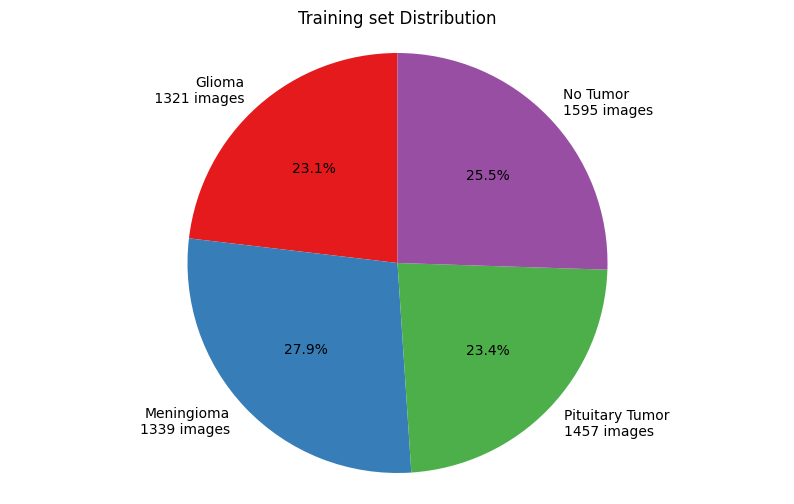

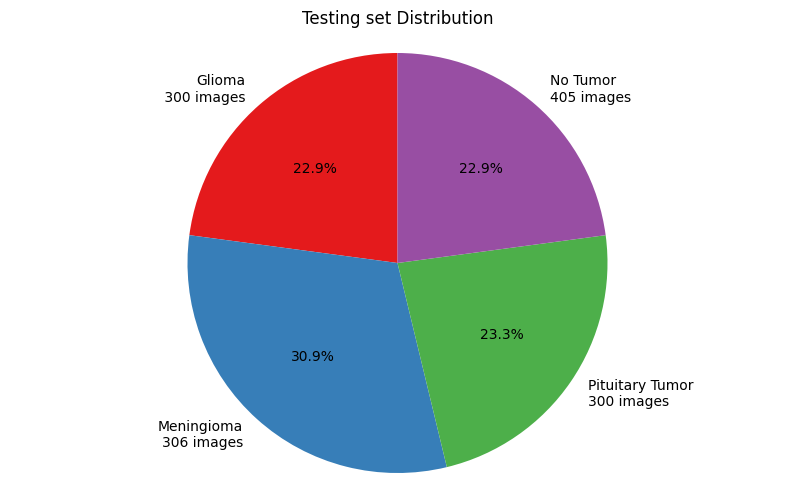

In [3]:
#Pie Charts Detailing how many samples are present

glioma_length = len(os.listdir(images_glioma_path))
no_tumor_length = len(os.listdir(images_notumor_path))
menin_length = len(os.listdir(images_menin_path))
pituitary_length = len(os.listdir(images_pituitary_path))

testing_glioma_length = len(os.listdir(testing_images_glioma_path))
testing_no_tumor_length = len(os.listdir(testing_images_notumor_path))
testing_menin_length = len(os.listdir(testing_images_menin_path))
testing_pituitary_length = len(os.listdir(testing_images_pituitary_path))

#Training set Pie Chart
labels = [f'Glioma\n {glioma_length} images',
          f'Meningioma\n{menin_length} images',
          f'Pituitary Tumor\n{pituitary_length} images',
          f'No Tumor\n{no_tumor_length} images']
          
label_counts = [glioma_length, no_tumor_length, menin_length, pituitary_length] 

plt.figure(figsize=(10,6))
plt.pie(label_counts, labels= labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set1.colors)
plt.title("Training set Distribution")
plt.axis('equal') 
plt.show()

#Testing set Pie Chart
testing_labels =  [f'Glioma\n {testing_glioma_length} images',
                  f'Meningioma\n{testing_menin_length} images',
                  f'Pituitary Tumor\n{testing_pituitary_length} images',
                  f'No Tumor\n{testing_no_tumor_length} images']

label_counts = [testing_glioma_length, testing_no_tumor_length, testing_menin_length, testing_pituitary_length] 

plt.figure(figsize=(10,6))
plt.pie(label_counts, labels = testing_labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set1.colors)
plt.title("Testing set Distribution")
plt.axis('equal') 
plt.show()



## 1.2 Training Sets

In [4]:
image_size = (128, 128)

# Lists to hold image data and labels
X = []
y = []

# Function to load and preprocess images
def load_images(folder_path, label):
    print(f"Loading from: {folder_path}")
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(img_path).convert("RGB")
            img = img.resize(image_size)
            X.append(np.array(img) / 255.0)  # Normalize
            y.append(label)
        except Exception as e:
            print(f"Skipped: {img_path} — Error: {e}")

# Load images from each folder
load_images(images_glioma_path, 0)  # Label 0 = Glioma
load_images(images_menin_path, 1)   # Label 1 = Meningioma
load_images(images_pituitary_path, 2)  # Label 2 = Pituitary Tumor
load_images(images_notumor_path, 3)  # Label 3 = No tumor

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Check data status
print("Total images loaded:", len(X))
if len(X) > 0:
    print("Image shape:", X[0].shape)
else:
    print("No images loaded.")

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))

Loading from: Training/glioma
Loading from: Training/meningioma
Loading from: Training/pituitary
Loading from: Training/notumor
Total images loaded: 5712
Image shape: (128, 128, 3)
Training set size: 4569
Validation set size: 1143


## 1.3 Conv2D Processing and Testing 

In [5]:
y_train_cat = to_categorical(y_train, num_classes=4)
y_val_cat = to_categorical(y_val, num_classes=4)


#Conv2D to run through the images and recog. patterns
model = Sequential([
    Input(shape=(128, 128, 3)), #Input layer sizing

    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(4, activation='softmax')  
])

model.compile(
    optimizer='adam',loss='categorical_crossentropy',  metrics=['accuracy']
)

early_stop = EarlyStopping(monitor = "val_loss", patience = 3, restore_best_weights=True)
history = model.fit(X_train, y_train_cat, validation_data=(X_val, y_val_cat), epochs=50, callbacks =[early_stop])

Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 117ms/step - accuracy: 0.4290 - loss: 1.1713 - val_accuracy: 0.7034 - val_loss: 0.6746
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.7660 - loss: 0.5818 - val_accuracy: 0.7349 - val_loss: 0.6276
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.8190 - loss: 0.4549 - val_accuracy: 0.7997 - val_loss: 0.4780
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.8556 - loss: 0.3912 - val_accuracy: 0.8425 - val_loss: 0.3895
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 113ms/step - accuracy: 0.8659 - loss: 0.3536 - val_accuracy: 0.8801 - val_loss: 0.3107
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.8883 - loss: 0.2832 - val_accuracy: 0.8696 - val_loss: 0.3190
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.9017 - loss: 0.2544 - val_accuracy: 0.8749 - val_loss: 0.2958
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.9214 - loss: 0

## 1.4 Plot Evaluation

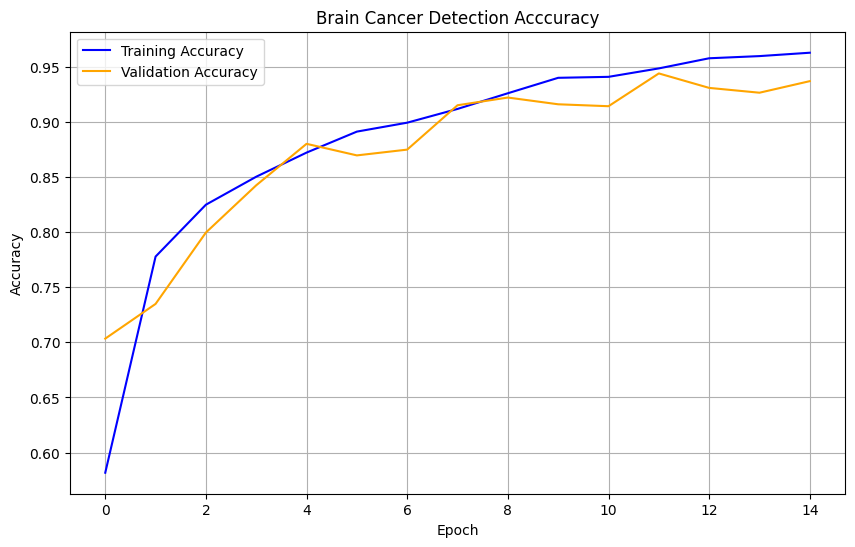

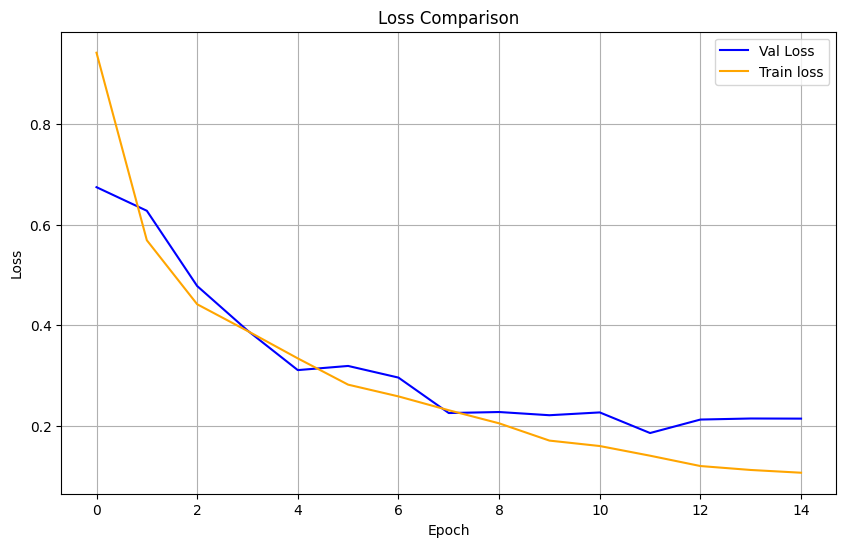

In [6]:
#Plot for the training and validation accuracy

plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', color = 'blue')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Brain Cancer Detection Acccuracy")
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(10,6))
plt.plot(history.history['val_loss'], label = 'Val Loss', color = 'blue')
plt.plot(history.history['loss'], label = 'Train loss', color = 'orange')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Comparison")
plt.grid(True)
plt.legend()
plt.show()

## 1.5 Testing model w/ Testing Set

In [7]:
#Loads Predictions

Xnew = []
ynew = []

#Loads the testing images for comparison
def load_prediction_images(folder_path, label):
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(img_path).convert("RGB")
            img = img.resize(image_size)
            Xnew.append(np.array(img) / 255.0)  # Normalize
            ynew.append(label)
        except Exception as e:
            print(f"Skipped: {img_path} — Error: {e}")

load_prediction_images(testing_images_glioma_path, 0)
load_prediction_images(testing_images_menin_path, 1)
load_prediction_images(testing_images_pituitary_path, 2)
load_prediction_images(testing_images_notumor_path, 3)

Xnew = np.array(Xnew)
ynew = np.array(ynew)

#Compares and scored the accuracy of the prediction
prediction = model.predict(Xnew)
prediction_classes = np.argmax(prediction, axis= 1)

accuracy = accuracy_score(ynew, prediction_classes)
print(f"The accuracy of the model is {accuracy: .4f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step
The accuracy of the model is  0.9367


## 1.6 Matrix Assessment

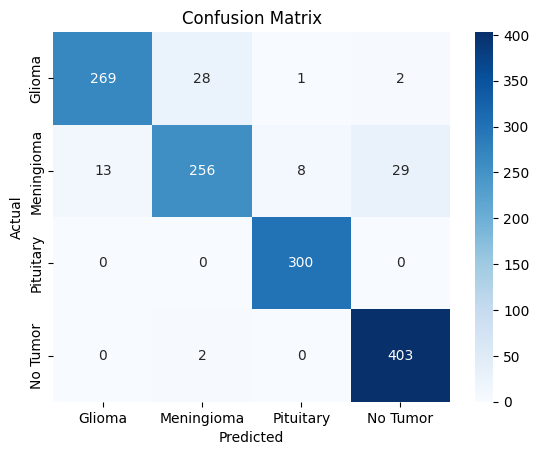

In [8]:
#Matrix Diagram

cm = confusion_matrix(ynew, prediction_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Glioma', 'Meningioma', 'Pituitary', 'No Tumor'], yticklabels=['Glioma', 'Meningioma', 'Pituitary', 'No Tumor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
